# LinearRegression model 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#plt.style.use('seaborn-whitegrid')

In [2]:
df = pd.read_excel('car.xlsx')

In [3]:
df.head()

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3,Name
0,5.555556,5.555556,18.0,8,3.07,1.30,3.504,12.0,70,1,1,1,0,0,chevrolet chevelle malibu
1,6.666667,6.666667,15.0,8,3.50,1.65,3.693,11.5,70,1,1,1,0,0,buick skylark 320
2,5.555556,5.555556,18.0,8,3.18,1.50,3.436,11.0,70,1,1,1,0,0,plymouth satellite
3,6.250000,6.250000,16.0,8,3.04,1.50,3.433,12.0,70,1,1,1,0,0,amc rebel sst
4,5.882353,5.882353,17.0,8,3.02,1.40,3.449,10.5,70,1,1,1,0,0,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   GallonsPer100Miles        392 non-null    float64
 1   GallonsPer100MilesTo1981  362 non-null    float64
 2   MPG                       392 non-null    float64
 3   Cylinders                 392 non-null    int64  
 4   Displacement100ci         392 non-null    float64
 5   Horsepower100             392 non-null    float64
 6   Weight1000lb              392 non-null    float64
 7   Seconds0to60              392 non-null    float64
 8   Year                      392 non-null    int64  
 9   Year70To81                392 non-null    int64  
 10  Origin                    392 non-null    int64  
 11  Origin.Eq.1               392 non-null    int64  
 12  Origin.Eq.2               392 non-null    int64  
 13  Origin.Eq.3               392 non-null    int64  
 14  Name      

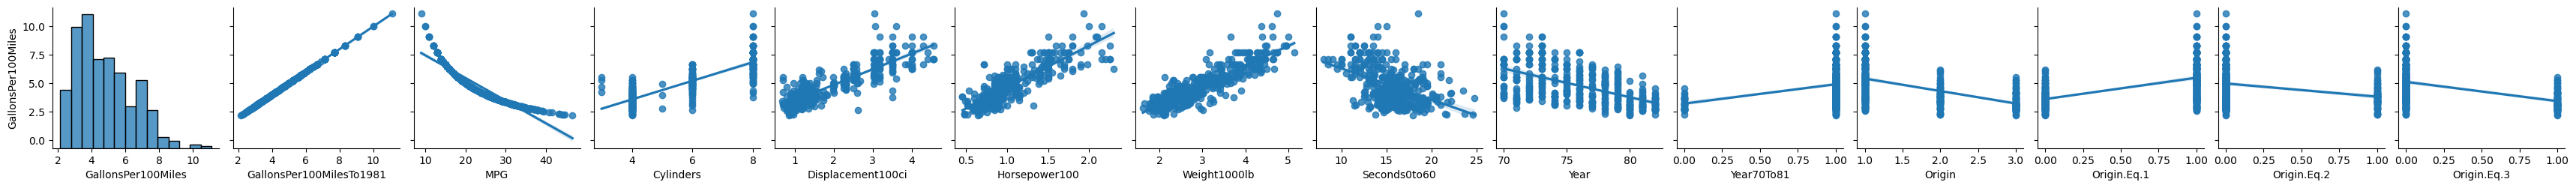

In [5]:
import seaborn as sns
# Plot scatterplots to study relationships with the target variable
sns.pairplot(df,y_vars=['GallonsPer100Miles'], x_vars=df.columns[:-1], kind = 'reg')


In [6]:
# Calculate correlation coefficients
correlation_matrix = df.corr()['GallonsPer100Miles']
print(correlation_matrix)


GallonsPer100Miles          1.000000
GallonsPer100MilesTo1981    1.000000
MPG                        -0.935935
Cylinders                   0.839385
Displacement100ci           0.866050
Horsepower100               0.854809
Weight1000lb                0.885056
Seconds0to60               -0.456338
Year                       -0.558255
Year70To81                  0.272419
Origin                     -0.532932
Origin.Eq.1                 0.546366
Origin.Eq.2                -0.264829
Origin.Eq.3                -0.409405
Name: GallonsPer100Miles, dtype: float64


In [7]:
# choosing the independent variables for the model
independent_vars = ["Weight1000lb", "Horsepower100", "Cylinders", "Displacement100ci","Year" ]
# Create a new DataFrame with selected independent variables and target variable to find fuel efficiency 
data = df[independent_vars + ["GallonsPer100Miles"]]
data

,Weight1000lb,Horsepower100,Cylinders,Displacement100ci,Year,GallonsPer100Miles
0,3.504,1.30,8,3.07,70,5.555556
1,3.693,1.65,8,3.50,70,6.666667
2,3.436,1.50,8,3.18,70,5.555556
3,3.433,1.50,8,3.04,70,6.250000
4,3.449,1.40,8,3.02,70,5.882353
...,...,...,...,...,...,...
387,2.790,0.86,4,1.40,82,3.703704
388,2.130,0.52,4,0.97,82,2.272727
389,2.295,0.84,4,1.35,82,3.125000
390,2.625,0.79,4,1.20,82,3.571429


In [8]:
print(data.isnull().sum())
print(data.info())

Weight1000lb          0
Horsepower100         0
Cylinders             0
Displacement100ci     0
Year                  0
GallonsPer100Miles    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Weight1000lb        392 non-null    float64
 1   Horsepower100       392 non-null    float64
 2   Cylinders           392 non-null    int64  
 3   Displacement100ci   392 non-null    float64
 4   Year                392 non-null    int64  
 5   GallonsPer100Miles  392 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 18.5 KB
None


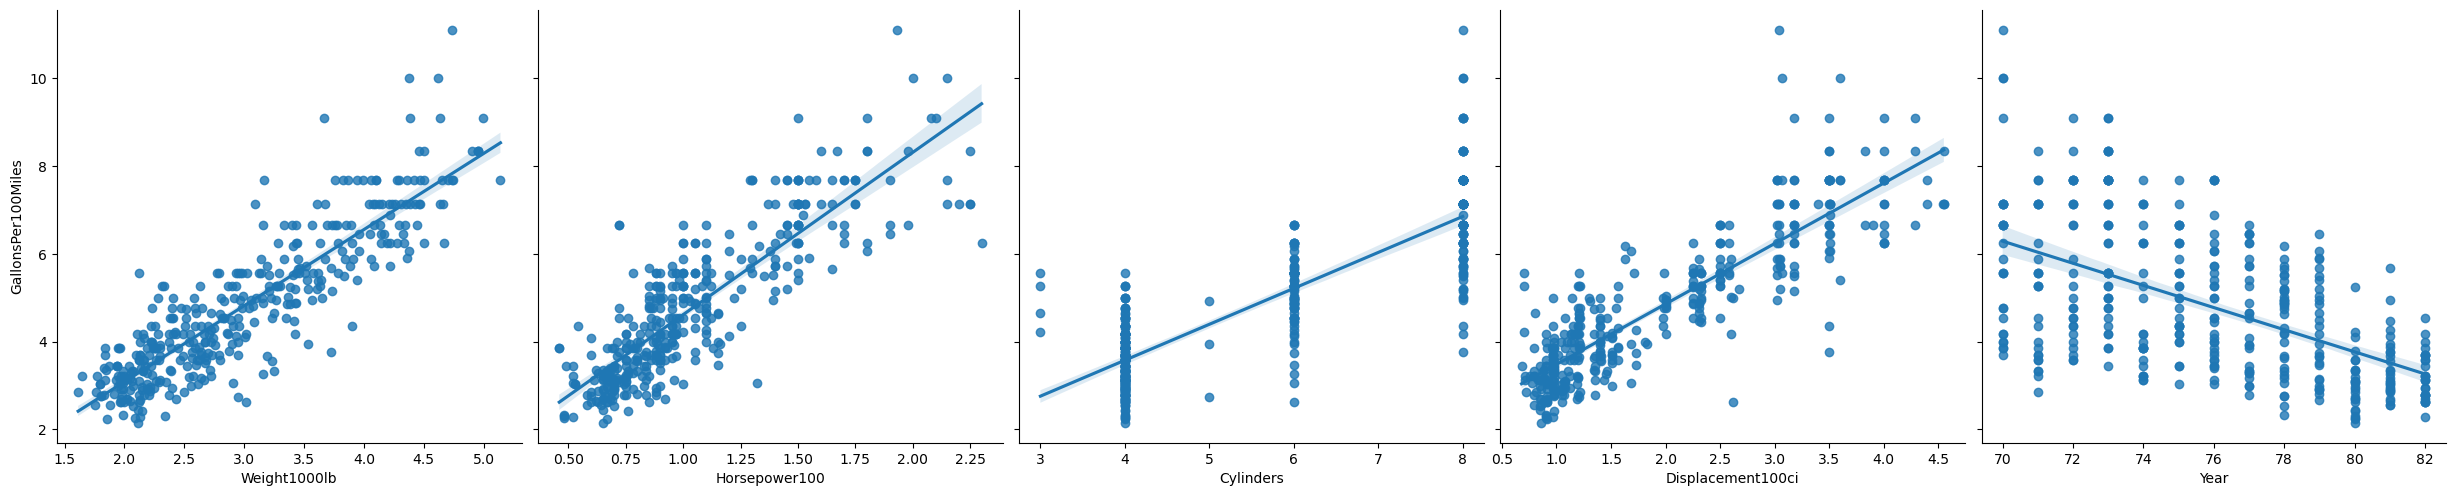

In [9]:
# Scatter plot with selected variables
sns.pairplot(data, x_vars=independent_vars, y_vars="GallonsPer100Miles",kind = 'reg', height=5)
plt.show()

In [10]:
# Calculate correlation coefficients with respect target variable
correlation_data = data.corr()['GallonsPer100Miles']
print(correlation_data)

Weight1000lb          0.885056
Horsepower100         0.854809
Cylinders             0.839385
Displacement100ci     0.866050
Year                 -0.558255
GallonsPer100Miles    1.000000
Name: GallonsPer100Miles, dtype: float64


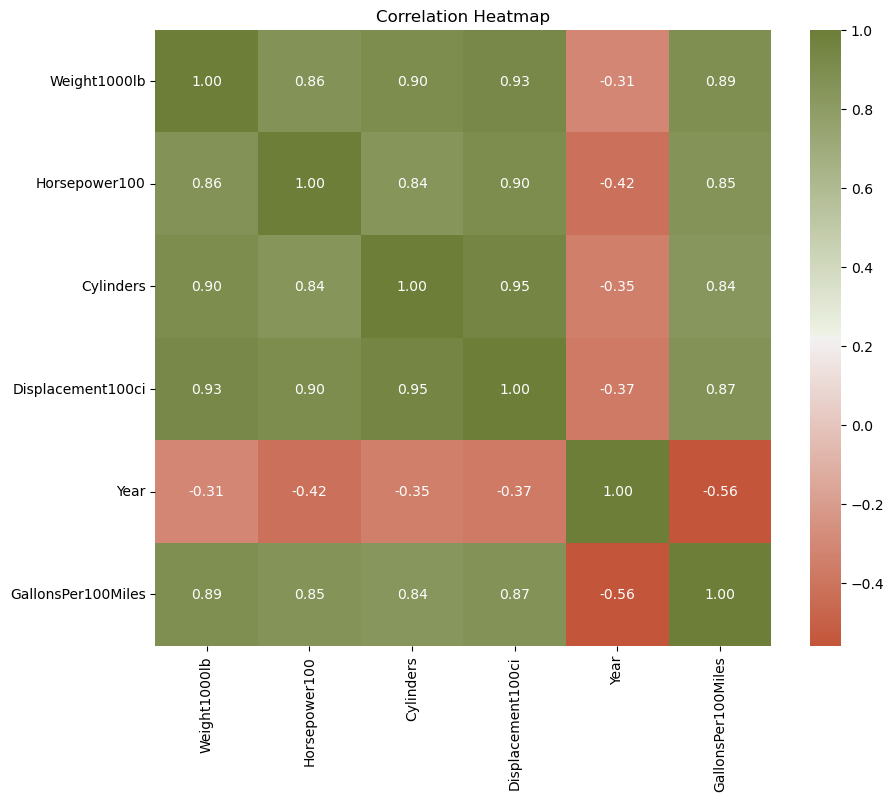

In [11]:
# Heat map
correlation_heat = data.corr()
#print(correlation_heat)
# Set color palette
cmap = sns.diverging_palette(20, 100, as_cmap=True)

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_heat, cmap=cmap, annot=True, fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = data[independent_vars]
y = data["GallonsPer100Miles"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and fit the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)



LinearRegression()

In [13]:
print("Coefficient of :",independent_vars)
print(lr_model.coef_)
print()
print("Intercept value: ",lr_model.intercept_)

Coefficient of : ['Weight1000lb', 'Horsepower100', 'Cylinders', 'Displacement100ci', 'Year']
[ 1.15731097  0.78678982  0.14232355 -0.13811997 -0.13498945]

Intercept value:  10.264243094899504


# Predicting 

In [14]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = lr_model.predict(X_test)
#print(y_pred)

#Accuracy score on training set
print("Training accuracy : ",lr_model.score(X_train,y_train))

#Accuracy score on test set
print("Test accuracy : ",lr_model.score(X_test,y_test))#here it same as comparing predic from X_test with y_test
"""The score method of the linear regression model calculates the R-squared (R^2) score internally when we
pass the features (X_test) and the target (y_test) as arguments."""

# Calculate R-squared (R^2) score
#r2_score_value = r2_score(y_test, y_pred)
#print("R-squared (R^2) Score:", r2_score_value)

"""The r2_score function calculates the R-squared (R^2) score when we pass the true values (y_test) and 
the predicted values (y_pred) as arguments.
"""


Training accuracy :  0.879016551992926
Test accuracy :  0.8957087100669721


'The r2_score function calculates the R-squared (R^2) score when we pass the true values (y_test) and \nthe predicted values (y_pred) as arguments.\n'

In [15]:
# Calculate the mean squared error
"""MSE provides a measure of how well the regression model fits the data. 
A lower MSE indicates that the model has better predictive accuracy and is closer to the true values. Conversely, 
a higher MSE suggests that the model's predictions are less accurate and have larger errors."""
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.2672926274737997


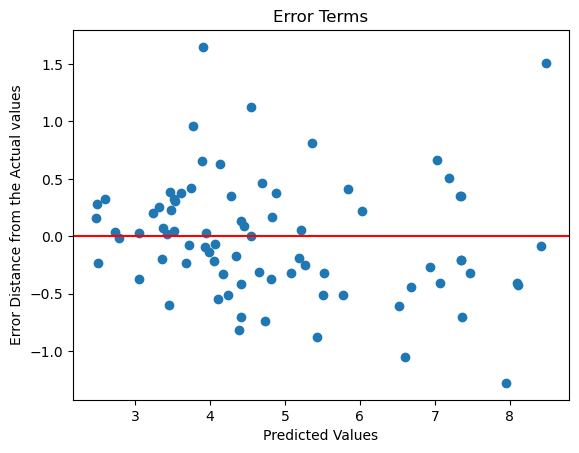

"The horizontal line represents 0 error. it is the line where predicted datapoints matched with the actual ones.\nThe residuals are randomly scattered around the horizontal line (y=0), it indicates that the model's predictions \nare unbiased.On average, the model's predictions are equally likely to be overestimations or underestimations \nof the actual values."

In [16]:
# Calculate the residuals (error terms)
error = y_test - y_pred

# Plot the residuals
plt.scatter(y_pred, error)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Values")
plt.ylabel("Error Distance from the Actual values")
plt.title("Error Terms")
plt.show()

"""The horizontal line represents 0 error. it is the line where predicted datapoints matched with the actual ones.
The residuals are randomly scattered around the horizontal line (y=0), it indicates that the model's predictions 
are unbiased.On average, the model's predictions are equally likely to be overestimations or underestimations 
of the actual values."""

In [17]:
# Find the maximum and minimum values for each variable
max_values = data.max()
min_values = data.min()

print("Max values:")
print(max_values)
print("\n")
print("Min values: ")
print (min_values)

Max values:
Weight1000lb           5.140000
Horsepower100          2.300000
Cylinders              8.000000
Displacement100ci      4.550000
Year                  82.000000
GallonsPer100Miles    11.111111
dtype: float64


Min values: 
Weight1000lb           1.613000
Horsepower100          0.460000
Cylinders              3.000000
Displacement100ci      0.680000
Year                  70.000000
GallonsPer100Miles     2.145923
dtype: float64


In [18]:
# Create a new data sample for interpolation
new_interpolation_data = pd.DataFrame({
    "Weight1000lb": [4.940000, 3.140000, 1.990000],
    "Horsepower100": [2.100000, 1.300000, 0.660000],
    "Cylinders": [8.000000, 4.000000, 3.000000],
    "Displacement100ci": [4.150000, 2.120000, 0.860000],
    "Year": [81, 79, 71]
})

# predictions on the interpolation data
interpolation_predictions = lr_model.predict(new_interpolation_data)
print(interpolation_predictions)

[7.26486283 4.53333947 3.8105096 ]


In [19]:
# Create a new data sample for extrapolation
new_extrapolation_data = pd.DataFrame({
    "Weight1000lb": [9.140000, 10.040000, 1.140000],
    "Horsepower100": [4.200000, 3.100000, 0.200000],
    "Cylinders": [10.000000, 2.000000, 9.000000],
    "Displacement100ci": [6.550000, 0.550000, 5.150000],
    "Year": [68, 95, 88]
})

# Make predictions on the extrapolation data
extrapolation_predictions = lr_model.predict(new_extrapolation_data)
print(extrapolation_predictions)


[15.48584956 11.70737683  0.43145791]
